
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Thursday, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1. Bias-variance (30pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [7]:
np.random.seed(11)
x_train = np.loadtxt("X_q0_train.csv").reshape(-1,1)
y_train = np.loadtxt("Y_q0_train.csv").reshape(-1,1)
x_test = np.loadtxt("X_q0_test.csv").reshape(-1,1)
y_test = np.loadtxt("Y_q0_test.csv").reshape(-1,1)
x_all = np.linspace(-10,10,101).reshape(-1,1)

We want to build a model that can predict y for unknown inputs x.

(a) (10pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data (y_train vs x_train and y_test vs x_test), fitted model (prediction on x_all vs x_all), and predictions on the test set (prediction on x_test vs x_test), clearly denoting the training, testing, and predicted points. All the plots must be in the same figure and be clearly labeled.

(b) (15pts) Fit polynomial models of degrees 2, 3 and 4, and the two given MLP Regression models (these two models will run for a different number of iterations when you fit them) to the training data. Report mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (prediction on x_all by different models vs x_all), and the predictions on the test set (prediction on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled.

(c) (5pts) Which of the polynomial models performed the best? Explain using the bias-variance tradeoff.


## Answer
(a)

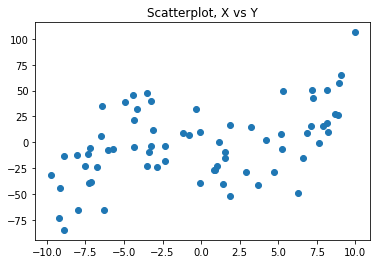

In [8]:
plt.scatter(x=x_train, y=y_train)
plt.title("Scatterplot, X vs Y")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

print("MSE: ", mean_squared_error(y_pred, y_test))

MSE:  1204.2491913174892


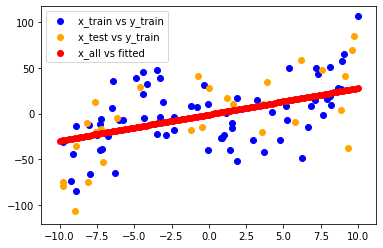

In [10]:
y_all_pred = reg.predict(x_all)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_train, y_train, c='blue', label='x_train vs y_train')
ax1.scatter(x_test, y_test, c='orange', label='x_test vs y_train')
ax1.scatter(x_all, y_all_pred, c='r', label='x_all vs fitted')
plt.legend(loc='upper left')
plt.show()

(b)

In [6]:
#Format data, run regression models

#format train data
x_train2 = np.power(x_train, 2)
x_train3 = np.power(x_train, 3)
x_train4 = np.power(x_train, 4)

tr_data = pd.DataFrame({'First': x_train[:, 0], 'Squared': x_train2[:, 0],
                     'Cubed': x_train3[:, 0], 'Fourth': x_train4[:, 0]})

train1 = tr_data['First'].to_frame()
train2 = tr_data[['First', 'Squared']]
train3 = tr_data[['First', 'Squared', 'Cubed']]
train4 = tr_data.copy(deep=True)


#format test data
x_test2 = np.power(x_test, 2)
x_test3 = np.power(x_test, 3)
x_test4 = np.power(x_test, 4)


te_data = pd.DataFrame({'First': x_test[:, 0], 'Squared': x_test2[:, 0],
                     'Cubed': x_test3[:, 0], 'Fourth': x_test4[:, 0]})

test1 = te_data['First'].to_frame()
test2 = te_data[['First', 'Squared']]
test3 = te_data[['First', 'Squared', 'Cubed']]
test4 = te_data.copy(deep=True)


#fit models
reg1 = LinearRegression().fit(train1, y_train)
reg2 = LinearRegression().fit(train2, y_train)
reg3 = LinearRegression().fit(train3, y_train)
reg4 = LinearRegression().fit(train4, y_train)

pred1 = reg1.predict(test1)
pred2 = reg2.predict(test2)
pred3 = reg3.predict(test3)
pred4 = reg4.predict(test4)



In [7]:
#MLP Regressors

from sklearn.neural_network import MLPRegressor

mlp_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=2000, activation='tanh').fit(train1, y_train)
mlp_2 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=200,  activation='tanh').fit(train1, y_train)

pred5 = mlp_1.predict(x_test)
pred6 = mlp_2.predict(x_test)



C:\Users\gabej\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabej\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\gabej\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabej\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and

In [8]:
#output
print("1st Order:")
print("Train MSE: ", mean_squared_error(reg1.predict(train1), y_train))
print("Test MSE: ", mean_squared_error(pred1, y_test))
print()

print("2nd Order:")
print("Train MSE: ", mean_squared_error(reg2.predict(train2), y_train))
print("Test MSE: ", mean_squared_error(pred2, y_test))
print()

print("3rd Order:")
print("Train MSE: ", mean_squared_error(reg3.predict(train3), y_train))
print("Test MSE: ", mean_squared_error(pred3, y_test))
print()

print("4th Order:")
print("Train MSE: ", mean_squared_error(reg4.predict(train4), y_train))
print("Test MSE: ", mean_squared_error(pred4, y_test))
print()

print("MLP Regressor (200 iter):")
print("Train MSE: ", mean_squared_error(mlp_2.predict(y_train), y_train))
print("Test MSE: ", mean_squared_error(mlp_2.predict(x_test), y_test))
print()

print("MLP Regressor (2,000 iter):")
print("Train MSE: ", mean_squared_error(mlp_1.predict(y_train), y_train))
print("Test MSE: ", mean_squared_error(mlp_1.predict(x_test), y_test))
print()

1st Order:
Train MSE:  966.2629507059396
Test MSE:  1204.2491913174892

2nd Order:
Train MSE:  959.519020638559
Test MSE:  1276.3920769678757

3rd Order:
Train MSE:  624.5354778268197
Test MSE:  1152.2839917098186

4th Order:
Train MSE:  622.4127493286283
Test MSE:  1183.1992247368148

MLP Regressor (200 iter):
Train MSE:  468.303170456804
Test MSE:  1442.660019846679

MLP Regressor (2,000 iter):
Train MSE:  920.3169991296481
Test MSE:  1098.819661549591



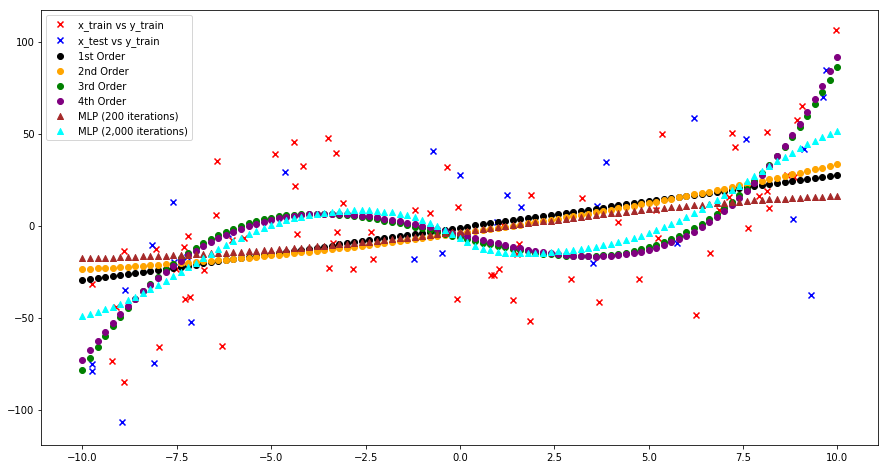

In [9]:
x_all2 = np.power(x_all, 2)
x_all3 = np.power(x_all, 3)
x_all4 = np.power(x_all, 4)


all_data = pd.DataFrame({'First': x_all[:, 0], 'Squared': x_all2[:, 0],
                     'Cubed': x_all3[:, 0], 'Fourth': x_all4[:, 0]})

all1 = all_data['First'].to_frame()
all2 = all_data[['First', 'Squared']]
all3 = all_data[['First', 'Squared', 'Cubed']]
all4 = all_data.copy(deep=True)


g_pred1 = reg1.predict(all1)
g_pred2 = reg2.predict(all2)
g_pred3 = reg3.predict(all3)
g_pred4 = reg4.predict(all4)
g_pred5 = mlp_2.predict(all1)
g_pred6 = mlp_1.predict(all1)




fig = plt.figure()
plt.gcf().set_size_inches(15, 8)
ax1 = fig.add_subplot(111)
ax1.scatter(x_train, y_train, c='r', marker = 'x', label='x_train vs y_train')
ax1.scatter(x_test, y_test, c='b', marker = 'x', label='x_test vs y_train')
ax1.scatter(x_all, g_pred1, c='black', label='1st Order')
ax1.scatter(x_all, g_pred2, c='orange', label='2nd Order')
ax1.scatter(x_all, g_pred3, c='g', label='3rd Order')
ax1.scatter(x_all, g_pred4, c='purple', label='4th Order')
ax1.scatter(x_all, g_pred5, c='brown', marker = '^', label='MLP (200 iterations)')
ax1.scatter(x_all, g_pred6, c='cyan', marker = '^', label='MLP (2,000 iterations)')
plt.legend(loc='upper left')
plt.show()

(c) 

Answer: The 3rd Order polynomial regression had the best performance.  In terms of the bias/variance trade-off, the 3rd Order regression had less bias and more variance than the 1st and 2nd Order regressions.  The bias lost by moving to a 3rd Order polynomial was greater than the variance gained by adding that term.  The 4th Order regression had less bias and more variance than the 3rd, but the decrease in bias was less than the increase in variance.  This can be seen in the above plot.  The 3rd and 4th Order polynomials are incredibly similar, which means that adding the 4th order term doesn't help the model better represent the behavior of the data.  So the bias isn't really changing, but adding the fourth term still increases the variance.

# Question 2. Number of data points required for Linear Regression (30pts)

In this question, we will explore empirically estimating a known data distribution. Let the data be generated by the probabilistic model $y_i = w^T x_i + \epsilon$. Here $x$ is 10 dimensional, and it's features are uniformly drawn values from $0$ to $1$. The true coefficients $w$ are set to be $1, 2, 3, \dots, 10$. Epsilon is drawn from a 0 mean unit variance normal distribution. We can now estimate these true coefficients by using linear regression on sample data points from the distribution. 

1. Generate 100 sample points $(x, y)$ according to the above distribution. Use the [np.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) function. (2pts)
2. Fit a linear regression model through the above data and report the MSE. (3 pts)
3. Generate 50 sample points $(x, y)$ to be the test set. Now, generate different amounts of train data points ranging from 20 data points to 1000 data points (intervals of 1) and plot how the MSE varies with increasing the train data. At the point where the MSE is minimum, print the corresponding coefficients. (10pts)
4. In this question, since we know the true coefficients, we can investigate how close the estimated coefficients are to the true coefficients. We will use $MSE(coefficients)$ which is MSE between the true coefficients and the estimated coefficients as the metric to see how close the estimated coefficients are to the true coefficients; this is not to be confused with the MSE between the predicted $y$ and the true $y$ which is commonly used. Hence, $MSE(coefficients) = \frac{1}{num\_coefficients}\sum_{i=1}^{num\_coefficients} (\theta_i - \hat{\theta}_i)^2$ where $\theta_i$ are the true coefficients and $\hat{\theta}_i$ are the estimated coefficients.
Using the $MSE(coefficients)$ as the metric, about how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes). Now, use only the first three coefficients, generate $x$ which is 3 dimensional (instead of 10 dimensional as before) and the corresponding $y$ for each $x$. In this case, when $x$ is three dimensional, how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes).(15pts)


1.

In [10]:
x_train = np.random.uniform(size=(100,10))
e = np.random.normal(size=(100))

y_train = []
coeff = [1,2,3,4,5,6,7,8,9,10]

for i in range(len(x_train)):
    y_train.append(np.matmul(x_train[i], coeff)+e[i])


2.

In [11]:
r_reg1 = LinearRegression().fit(x_train, y_train)
r_pred1_train = r_reg1.predict(x_train)
print("Train MSE: ", mean_squared_error(r_pred1_train, y_train))

Train MSE:  0.8251407849539488


3.

In [12]:
x_test = np.random.uniform(size=(50,10))
e = np.random.normal(size=(50))

y_test = []

for i in range(len(x_test)):
    y_test.append(np.matmul(x_test[i], coeff)+e[i])


In [13]:
point_count = []
reg_MSE = []
coefficients = []

for i in range(20,1001):
    x_train = np.random.uniform(size=(i,10))
    e = np.random.normal(size=(i))
    
    y_train = []
    
    for j in range(len(x_train)):
        y_train.append(np.matmul(x_train[j], coeff)+e[j])
    
    r_reg = LinearRegression().fit(x_train, y_train)
    r_pred = r_reg.predict(x_test)
    point_count.append(i)
    reg_MSE.append(mean_squared_error(r_pred, y_test))
    coefficients.append(r_reg.coef_)


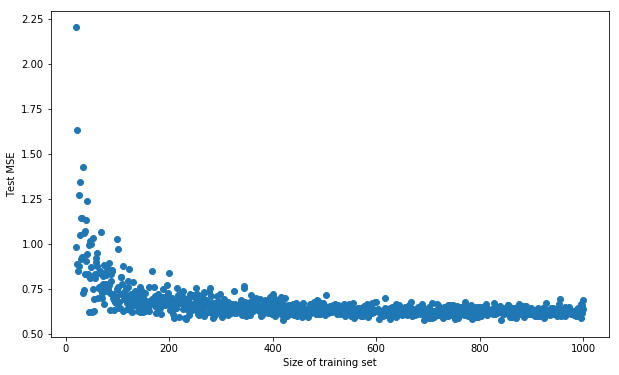

In [14]:
fig = plt.figure()
plt.gcf().set_size_inches(10, 6)
ax1 = fig.add_subplot(111)
ax1.scatter(x=point_count, y=reg_MSE)
ax1.set_xlabel("Size of training set")
ax1.set_ylabel("Test MSE")
plt.show()

In [15]:
df = pd.DataFrame({'Training_Size': point_count, 'Test MSE': reg_MSE, 'Coef': coefficients})
s = df.sort_values(by='Test MSE')[['Training_Size', 'Coef']].head(1)

q = s['Coef'].values
print('Coefficients:', q)

Coefficients: [array([0.62858562, 1.92116348, 2.8124632 , 3.99255537, 5.05508914,
       5.78490251, 7.04286469, 7.86428062, 8.9394076 , 9.79660534])]


4. 

In [16]:
#returns MSE of coefficients of linear regression model
def gen_reg_coef(s, v=10, true_coeff = [1,2,3,4,5,6,7,8,9,10]):    
    x_train = np.random.uniform(size=(s, v))
    e = np.random.normal(size=(s))
    
    y_train = []
    for i in range(len(x_train)):
        y_train.append(np.matmul(x_train[i], true_coeff) + e[i])
        
    reg = LinearRegression().fit(x_train, y_train)
    
    return mean_squared_error(true_coeff, reg.coef_)


In [17]:
sum = 0
for i in range(10):
    close = False
    size = 10

    while(not close):
        c_MSE = gen_reg_coef(size)

        if(c_MSE < 0.01):
            close = True
        else:
            size = size+1
    sum = sum + size

print("Size:", sum/10)

Size: 312.4


In [18]:
sum = 0
for i in range(10):
    close = False
    size = 10

    while(not close):
        c_MSE = gen_reg_coef(size, v=3, true_coeff = [1,2,3])

        if(c_MSE < 0.01):
            close = True
        else:
            size = size+1
    sum = sum + size

print("Size:", sum/10)

Size: 67.1


# Question 3. Data Imputation Strategies (20pts)

The missing value problem is inevitable in predictive modeling and in order to build a useful model, it is important that these missing values are handled appropriately. There could be many reasons for the presence of missing values(represented as NaN in python) in the dataset, like the absence of information corresponding to the variable, failure to record the available value of the variable, some unknown semantics associated with NaN, etc. 

For the given dataset(file named q3_dataset.csv), fit a Linear Regression model to predict the dependent variable 'ViolentCrimesPerPop'. If you directly try to fit a model you would see an error saying that input contains NaN. So, in order to successfully fit a model, you need to handle these missing values and the performance of your model would depend on how you handle them. 

Your task is to try different imputation strategies for the different columns having missing values and see what works best. You could try the following -
1. Discard rows with missing data
2. Fill NaNs with 0s
3. Fill NaNs with column mean/mode/median
4. Use information from related columns (think of how you could do this)

A strategy could work better for one column and not work for another. Briefly justify why do you think that a particular strategy works better than the other.

Hint: Think about how do the missing values occur for a particular column like are they random or systematic, do they have any semantics?

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv('q3_dataset.csv')
print("Column-wise missing value percentage")
print(dataset.isnull().sum()/len(dataset)*100)

X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)


Column-wise missing value percentage
ViolentCrimesPerPop     0.000000
PolicBudgPerPop        84.002006
population              9.979940
householdsize          19.959880
numbUrban               7.321966
pctUrban                0.000000
medIncome               0.000000
perCapInc               0.000000
LandArea                0.000000
PopDens                 0.000000
PolicCars              84.002006
PctUnemployed           4.964895
PctEmploy               4.964895
dtype: float64


Comparing the full dataset to the dataset where PolicBudgPerPop is null, we see that every time PolicBudgPerPop is null, PolicCars is null as well.  This is likely because the survey was not able to retrieve accurate information from the police force of the area/city/county/state (not descried in data).  Additionally, filtering to null values relating to the police force does not seem to meaningfully impact data collection of other features.  Last, note that PctUnemployed and PctEmploy, like PolicCars and PolicBudgPerPop, have the same percent of null values.  This is another systematic behavior in data collection that should be addressed.


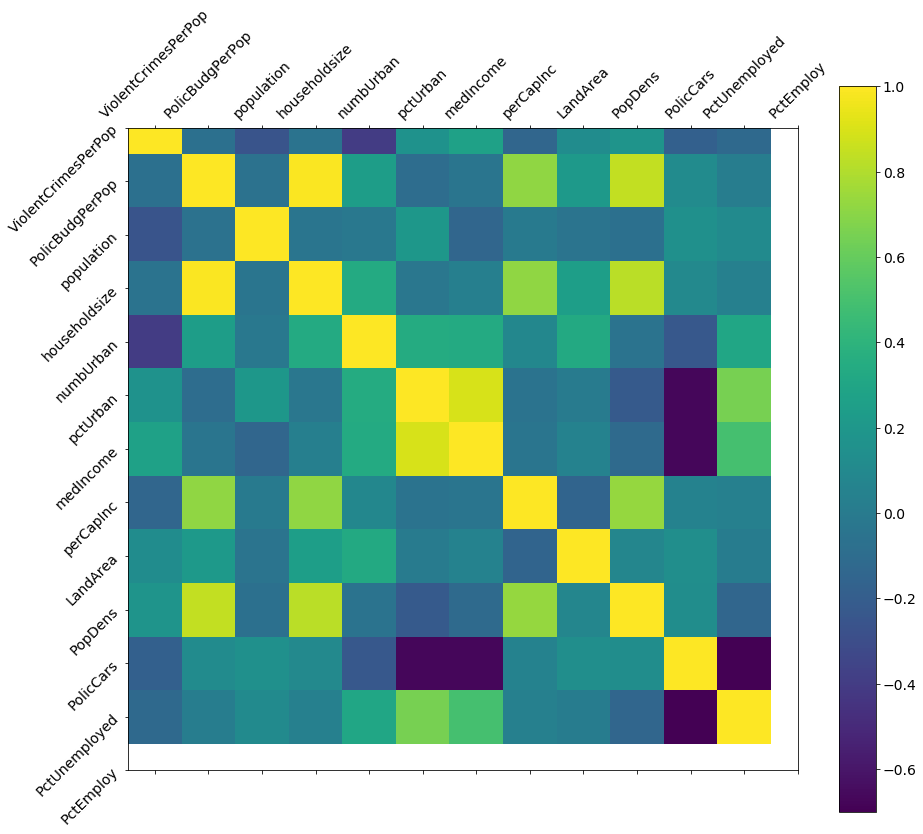

In [37]:
f = plt.figure(figsize=(15,13))
plt.matshow(X_train.corr(), fignum=f.number)
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=14, rotation=45)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

A few things to note here:
1. PolicBudgPerPop has a high correlation with householdsize
2. PopDens is correlated positively with PolicBudgperPop, householdsize, and perCapInc
3. pctUnemployed is highly negatively correlated with medIncome, perCapInc, and Pct Employ

<Figure size 2160x1440 with 0 Axes>

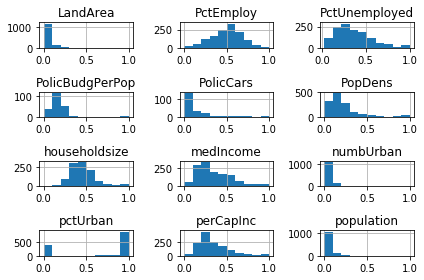

In [38]:
plt.figure(figsize=(30,20))
X_train.hist()

plt.tight_layout()
plt.show()

In [39]:
X_train.describe()

,PolicBudgPerPop,population,householdsize,numbUrban,pctUrban,medIncome,perCapInc,LandArea,PopDens,PolicCars,PctUnemployed,PctEmploy
count,225.000000,1247.000000,1102.000000,1295.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,225.000000,1320.000000,1320.000000
mean,0.191556,0.056351,0.460290,0.067197,0.698480,0.358151,0.349606,0.065964,0.231355,0.156667,0.367038,0.498848
std,0.162279,0.121818,0.162828,0.135733,0.443661,0.209824,0.193221,0.107995,0.203328,0.206672,0.203231,0.177259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000
25%,0.110000,0.010000,0.350000,0.000000,0.000000,0.200000,0.220000,0.020000,0.100000,0.040000,0.220000,0.380000
50%,0.150000,0.020000,0.430000,0.030000,1.000000,0.320000,0.300000,0.040000,0.170000,0.080000,0.330000,0.510000
75%,0.220000,0.050000,0.540000,0.070000,1.000000,0.490000,0.430000,0.070000,0.280000,0.190000,0.480000,0.630000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


LandArea, PopDens, ViolentCrimesPerPop, medIncome, numbUrban, perCapInc, and population are all skewed right (fill with median to best represent data).
householdsize looks approximately normal (fill with mean to best represent data).

Because PolicBudgPerPop and PolicCars have so many missing values, I am going to create binary columns that represent missing data.
I will also add a column for PctUnemployed and PctEmploy, because the collection of data of one feature dictates the collection of the other.  But because these two features have many fewer missing values, I will keep the original columns, filling PctUnemployed with median and PctEmploy with mean.

In [40]:


X_train['LandArea'] = X_train['LandArea'].fillna(X_train['LandArea'].median())
X_train['PopDens'] = X_train['PopDens'].fillna(X_train['PopDens'].median())
X_train['medIncome'] = X_train['medIncome'].fillna(X_train['medIncome'].median())
X_train['numbUrban'] = X_train['numbUrban'].fillna(X_train['numbUrban'].median())
X_train['perCapInc'] = X_train['perCapInc'].fillna(X_train['perCapInc'].median())
X_train['population'] = X_train['population'].fillna(X_train['population'].median())
X_train['PctUnemployed'] = X_train['PctUnemployed'].fillna(X_train['PctUnemployed'].median())
X_train['householdsize'] = X_train['householdsize'].fillna(X_train['householdsize'].mean())
X_train['PctEmploy'] = X_train['PctEmploy'].fillna(X_train['PctEmploy'].mean())
X_train['PoliceB'] = np.where(X_train['PolicCars'].isnull(), 0, 1)
X_train['EmploymentB'] = np.where(X_train['PctEmploy'].isnull(), 0, 1)

X_train = X_train.drop(['PolicCars'], axis=1)
X_train = X_train.drop(['PolicBudgPerPop'], axis=1)



X_test['LandArea'] = X_test['LandArea'].fillna(X_test['LandArea'].median())
X_test['PopDens'] = X_test['PopDens'].fillna(X_test['PopDens'].median())
X_test['medIncome'] = X_test['medIncome'].fillna(X_test['medIncome'].median())
X_test['numbUrban'] = X_test['numbUrban'].fillna(X_test['numbUrban'].median())
X_test['perCapInc'] = X_test['perCapInc'].fillna(X_test['perCapInc'].median())
X_test['population'] = X_test['population'].fillna(X_test['population'].median())
X_test['PctUnemployed'] = X_test['PctUnemployed'].fillna(X_test['PctUnemployed'].median())
X_test['householdsize'] = X_test['householdsize'].fillna(X_test['householdsize'].mean())
X_test['PctEmploy'] = X_test['PctEmploy'].fillna(X_test['PctEmploy'].mean())
X_test['PoliceB'] = np.where(X_test['PolicCars'].isnull(), 0, 1)
X_test['EmploymentB'] = np.where(X_test['PctEmploy'].isnull(), 0, 1)

X_test = X_test.drop(['PolicCars'], axis=1)
X_test = X_test.drop(['PolicBudgPerPop'], axis=1)

print(X_test.isnull().sum()/len(X_test)*100)

population       0.0
householdsize    0.0
numbUrban        0.0
pctUrban         0.0
medIncome        0.0
perCapInc        0.0
LandArea         0.0
PopDens          0.0
PctUnemployed    0.0
PctEmploy        0.0
PoliceB          0.0
EmploymentB      0.0
dtype: float64


In [42]:
#Regression with cleaned data
reg = LinearRegression().fit(X_train, Y_train)

print('Train MSE', mean_squared_error(reg.predict(X_train), Y_train))
print('Test MSE',  mean_squared_error(reg.predict(X_test), Y_test))

Train MSE 0.03069201652200844
Test MSE 0.03523268840045943


In [43]:
#Regression with data (na dropped)
dataset_hold = dataset_hold.dropna(how='any')

X = dataset_hold.drop(['ViolentCrimesPerPop'],axis=1).values
Y = dataset_hold['ViolentCrimesPerPop'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)

reg = LinearRegression().fit(X_train, Y_train)
 
print('Train MSE', mean_squared_error(reg.predict(X_train), Y_train))
print('Test MSE',  mean_squared_error(reg.predict(X_test), Y_test))

Train MSE 0.03049359580727429
Test MSE 0.04752623745776951


The Train MSE for both models is similar.  The Test MSE for the uncleaned regression is much worse, but that is likely due to the fact that the uncleaned dataset is so much smaller.

### Answer

# Question 4. PCA (conceptual) (5pts)

True of False : The goal of PCA is to create a lower-dimensional representation with principal components that are best at predicting the output variable.
Justify your answer

Answer: False.  The goal of PCA is to create a lower-dimensional representation with principal components that minimize the lost variance that occurs from compressing the space into a lower dimension.  As discussed in class, Principal Component Analysis finds the best subspace that captures as much data as possible.  This does not necessarily mean that a prediction will imporve or worsen after PCA is applied to the feature matrix.  Reducing dimensionality can improve model accuracy by eliminating noise, but that compression could also obscure behaviors in the data.